# Busqueda por Amplitud

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [4]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

['Guayaquil', 'Ambato']


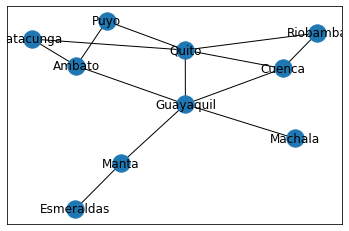

In [28]:
import networkx as grafico
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Guayaquil'
    solution = 'Ambato'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    
    
    ## Graficar Arbol
    grafic = grafico.Graph()
    grafic.add_nodes_from(connections)
    
    for key, lista in connections.items():
        for i in lista:
            grafic.add_edge(key,i)
            
    
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        grafico.draw_networkx(grafic, witch_label = True)
    else:
        print("No hay solucion !!!!")

# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo

In [ ]:
# Agregar la solucion en markdown (Informe)

## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

['Hospital Regional', 'Hospital del Rio']


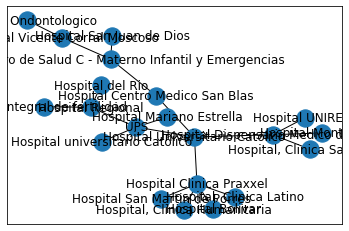

In [57]:
# Implementar
import networkx as grafico
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
         'UPS':{'Hospital Mariano Estrella', 'Hospital universitario Católico', 'Hospital Regional'},
         'Hospital Universitario Católico': {'Hospital Clinica Praxxel', 'Hospital Dispensario Medico del IESS', 'Hospital Centro Medico San Blas', 'UPS'},
         'Hospital Clinica Praxxel': {'Hospital San Martin de Porres', 'Hospital Bolivar', 'Hospital, Clinica Latino', 'Hospital, Clinica Humanitaria', 'Hospital Universitario Católico'},
         'Hospital Dispensario Medico del IESS':{'Hospital, Clinica Santa Ines', 'Hospital Monte Sinai', 'Hospital UNIREAS','Hospital Universitario Católico'},
         'Hospital Centro Medico San Blas':{'IESS - Centro de Salud C - Materno Infantil y Emergencias', 'Hospital Universitario Católico'},
         'IESS - Centro de Salud C - Materno Infantil y Emergencias':{'Hospital San Juan de Dios', 'Hospital Vicente Corral Moscoso', 'Hospital Centro Medico San Blas'}, 
         'Hospital Vicente Corral Moscoso': {'Hospital Ondontologico', 'IESS - Centro de Salud C - Materno Infantil y Emergencias'},
         'Hospital Regional': {'Unidad Integral de fertilidad ', 'Hospital del Rio', 'UPS'}
    }

    init_state = 'Hospital Regional'
    solution = 'Hospital del Rio'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    
    
    ## Graficar Arbol
    grafic = grafico.Graph()
    grafic.add_nodes_from(connections)
    
    for key, lista in connections.items():
        for i in lista:
            grafic.add_edge(key,i)
            
    
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        grafico.draw_networkx(grafic, witch_label = True)
    else:
        print("No hay solucion !!!!")




# Conclusiones

La resolucion del cuaderno